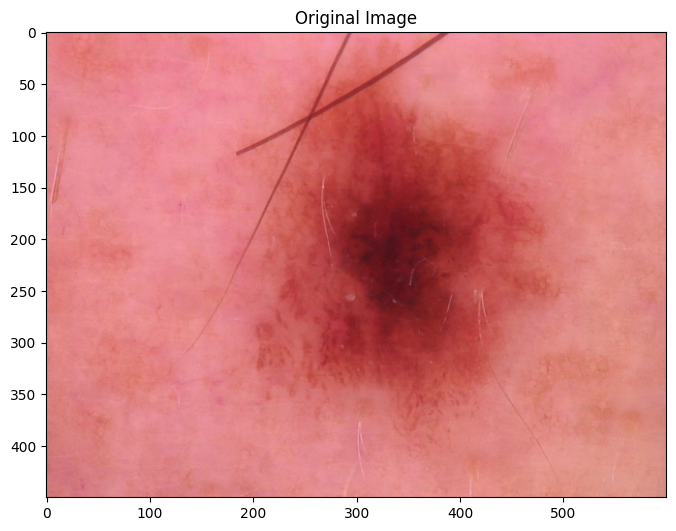

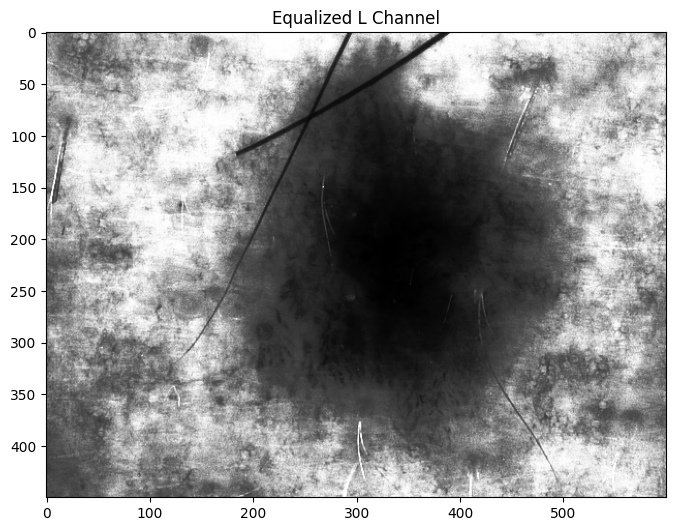

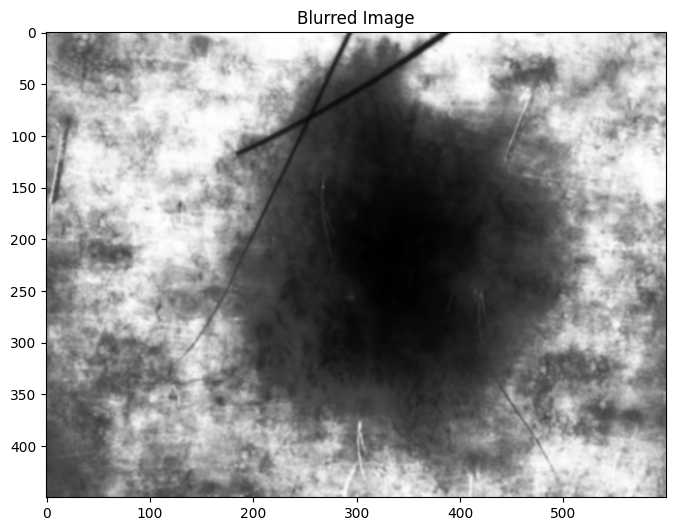

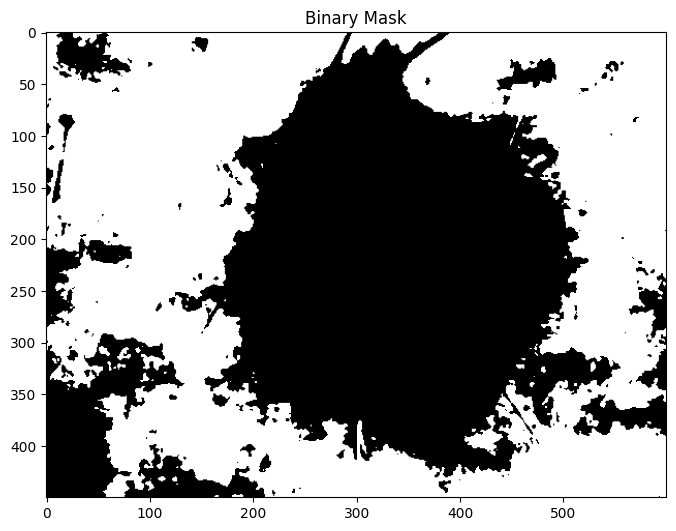

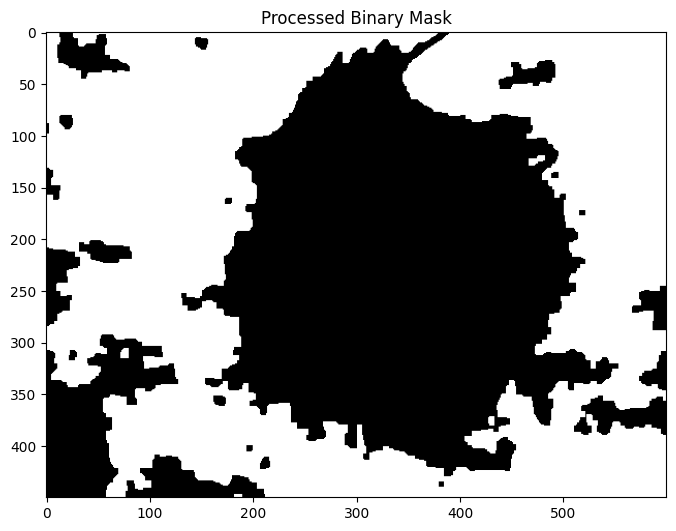

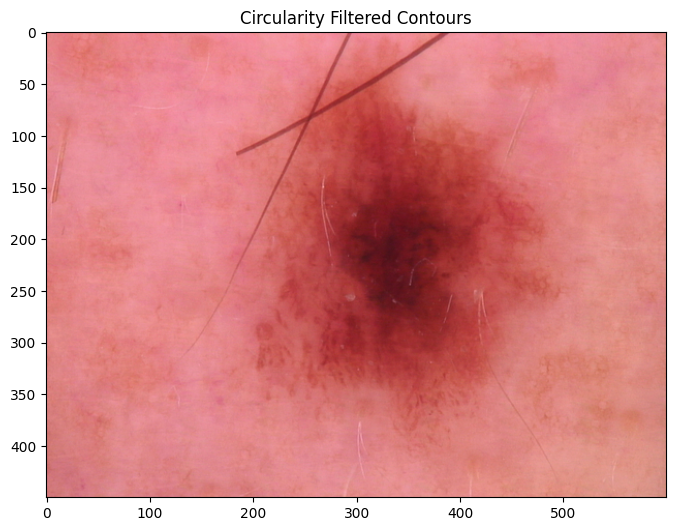

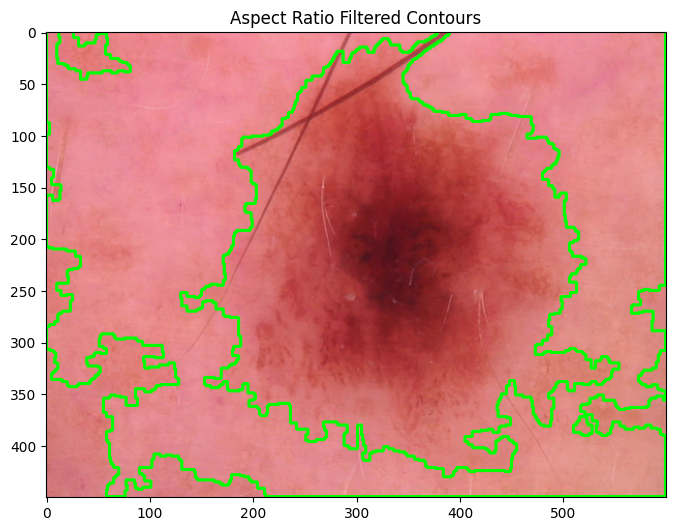

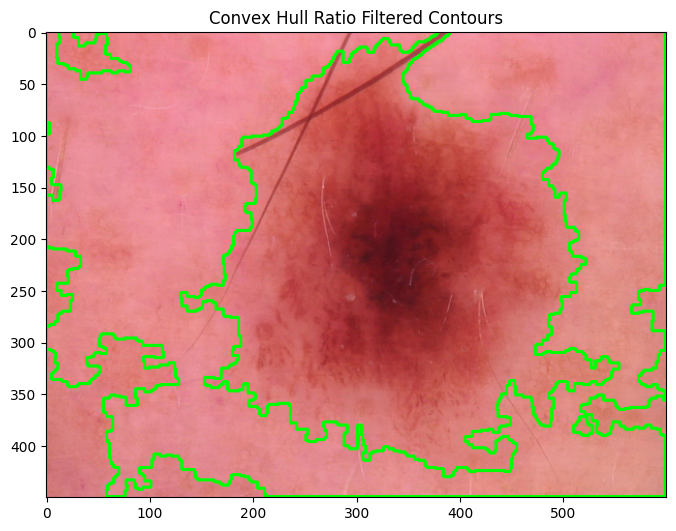

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image
image = cv2.imread('dataset\input_images\ISIC_0024306.jpg')

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Convert to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Extract the L channel (luminance)
l_channel = lab_image[:, :, 0]

# Apply histogram equalization to enhance contrast
l_channel_equalized = cv2.equalizeHist(l_channel)

# Display the equalized L channel
plt.figure(figsize=(8, 8))
plt.imshow(l_channel_equalized, cmap='gray')
plt.title('Equalized L Channel')
plt.show()

# Apply Gaussian blur to smooth the image
blurred_image = cv2.GaussianBlur(l_channel_equalized, (5, 5), 0)

# Display the blurred image
plt.figure(figsize=(8, 8))
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.show()

# Apply adaptive thresholding
_, binary_mask = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary mask
plt.figure(figsize=(8, 8))
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.show()

# Morphological operations (closing and opening)
kernel = np.ones((5, 5), np.uint8)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

# Display the processed binary mask
plt.figure(figsize=(8, 8))
plt.imshow(binary_mask, cmap='gray')
plt.title('Processed Binary Mask')
plt.show()

# Find contours
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Function to calculate circularity
def calculate_circularity(contour):
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    circularity = (4 * np.pi * area) / (perimeter ** 2)
    return circularity

# Filter contours based on circularity
min_circularity = 0.7  # Adjust based on your analysis
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area and calculate_circularity(cnt) > min_circularity]

# Draw contours on the original image
result_filtered_contours = image.copy()
cv2.drawContours(result_filtered_contours, filtered_contours, -1, (0, 255, 0), 2)

# Display the result after circularity filtering
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(result_filtered_contours, cv2.COLOR_BGR2RGB))
plt.title('Circularity Filtered Contours')
plt.show()

# Function to calculate aspect ratio
def calculate_aspect_ratio(contour):
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    return aspect_ratio

# Filter contours based on aspect ratio
max_aspect_ratio = 3.0  # Adjust based on your analysis
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area and calculate_aspect_ratio(cnt) < max_aspect_ratio]

# Draw contours on the original image
result_filtered_contours = image.copy()
cv2.drawContours(result_filtered_contours, filtered_contours, -1, (0, 255, 0), 2)

# Display the result after aspect ratio filtering
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(result_filtered_contours, cv2.COLOR_BGR2RGB))
plt.title('Aspect Ratio Filtered Contours')
plt.show()

# Function to calculate convex hull ratio
def calculate_convex_hull_ratio(contour):
    hull = cv2.convexHull(contour)
    contour_area = cv2.contourArea(contour)
    hull_area = cv2.contourArea(hull)
    convex_hull_ratio = contour_area / hull_area
    return convex_hull_ratio

# Filter contours based on convex hull ratio
max_convex_hull_ratio = 0.9  # Adjust based on your analysis
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area and calculate_convex_hull_ratio(cnt) < max_convex_hull_ratio]

# Draw contours on the original image
result_filtered_contours = image.copy()
cv2.drawContours(result_filtered_contours, filtered_contours, -1, (0, 255, 0), 2)

# Display the final result after convex hull ratio filtering
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(result_filtered_contours, cv2.COLOR_BGR2RGB))
plt.title('Convex Hull Ratio Filtered Contours')
plt.show()
